<a href="https://colab.research.google.com/github/Fillomon/CienciaDatos/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [31]:
# CREADO ARNULFO ARANDA CASTRO
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.graph_objects as go

#DIRECCION DE ARCHIVOS CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

#SELECCION DE LOS MINIMOS, QUE NO SON MINIMOS SON MARCADOS EN VERDE
def minimos_color(col):
    min_val=col.min();
    return['background-color: lightcoral' if v==min_val else 'background-color: green' for v in col]

#SELECCION DE MAXIMOS Y MARCADOS EN COLOR
def maximo_color(col):
    max_val=col.max()
    return ['background-color: lightcoral' if v == max_val else 'background-color: green' for v in col]

#FUNCION FACTURACION, COSTO - ENVIO, GANANCIA Y TIENDA
def resumen_mensual(df_tienda, nombre_tienda):
    agrupado = df_tienda.groupby(['ano-mes'])
    data = []
    for nombre, grupo_df in agrupado:
        TotFact = grupo_df['Precio']
        TotCosto = grupo_df['Costo de envío']
        TotalGanancia = TotFact - TotCosto
        data.append({
            "Grupo": nombre,
            "Facturado": TotFact.sum(),
            "CostoEnvio": TotCosto.sum(),
            "Ganancia": TotalGanancia.sum(),
            "Tienda": nombre_tienda
        })
    return pd.DataFrame(data)

##CONECTAMOS LAS URL DE LOS ARCHIVOS CON VARIABLES
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
#tienda.head()

###################################################
tienda['anho-mes'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda2['anho-mes'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda3[  'anho-mes'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda4['anho-mes'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha

dTienda1= pd.DataFrame(tienda)
dTiendaClear= dTienda1.drop(columns=['Cantidad de cuotas', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)

dTienda2= pd.DataFrame(tienda2)
dTienda2Clear= dTienda2.drop(columns=['Cantidad de cuotas', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)

dTienda3= pd.DataFrame(tienda3)
dTienda3Clear= dTienda3.drop(columns=['Cantidad de cuotas', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)

dTienda4= pd.DataFrame(tienda4)
dTienda4Clear= dTienda4.drop(columns=['Cantidad de cuotas', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)



#1. Análisis de facturación



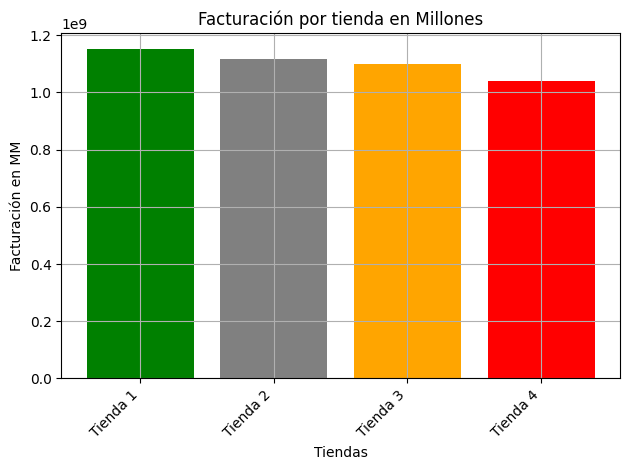

In [3]:
fTienda1= dTienda1['Precio'].sum()
fTienda2= dTienda2['Precio'].sum()
fTienda3= dTienda3['Precio'].sum()
fTienda4= dTienda4['Precio'].sum()
#fTienda# refiere a facturas de la tienda que se esta visualizando

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [fTienda1, fTienda2, fTienda3, fTienda4]
colores=['green', 'grey', 'orange', 'red']

plt.bar(tiendas, facturas, color=colores)
plt.xlabel('Tiendas')
plt.ylabel('Facturación en MM')
plt.title("Facturación por tienda en Millones")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()

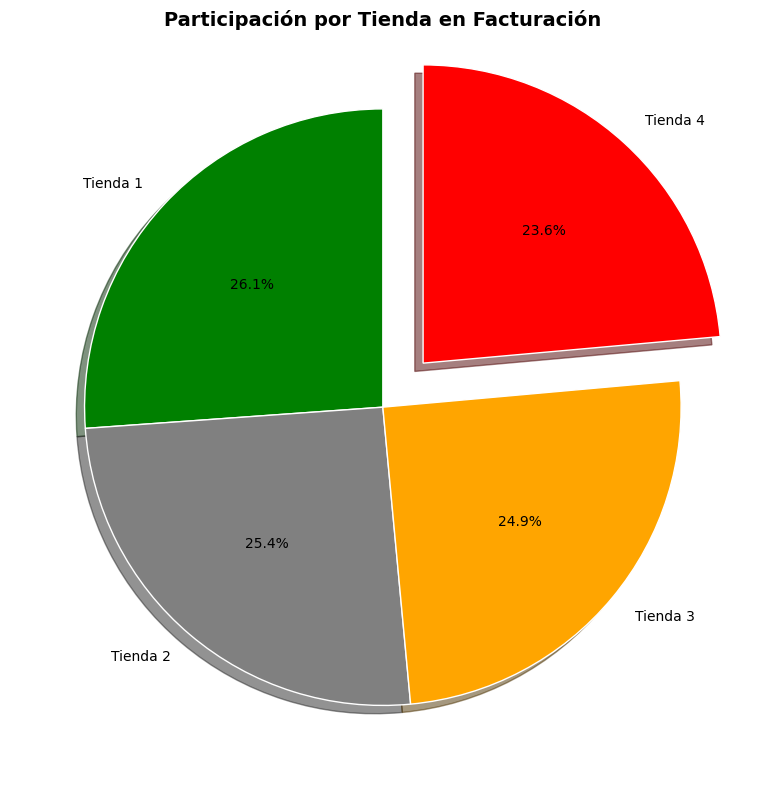

In [4]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [fTienda1, fTienda2, fTienda3, fTienda4]
colores=['green', 'grey', 'orange', 'red']
separacion = [0, 0, 0, 0.2]

plt.figure(figsize=(8, 8))  # Tamaño más amigable
plt.pie(
    facturas,
    labels=tiendas,
    explode=separacion,
    colors=colores,
    shadow=True,
    autopct='%1.1f%%',  # Muestra el porcentaje con un decimal
    startangle=90,     # Rotación para mejor distribución visual
    wedgeprops={'edgecolor': 'white'}  # Borde blanco para más claridad
)
plt.title("Participación por Tienda en Facturación", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

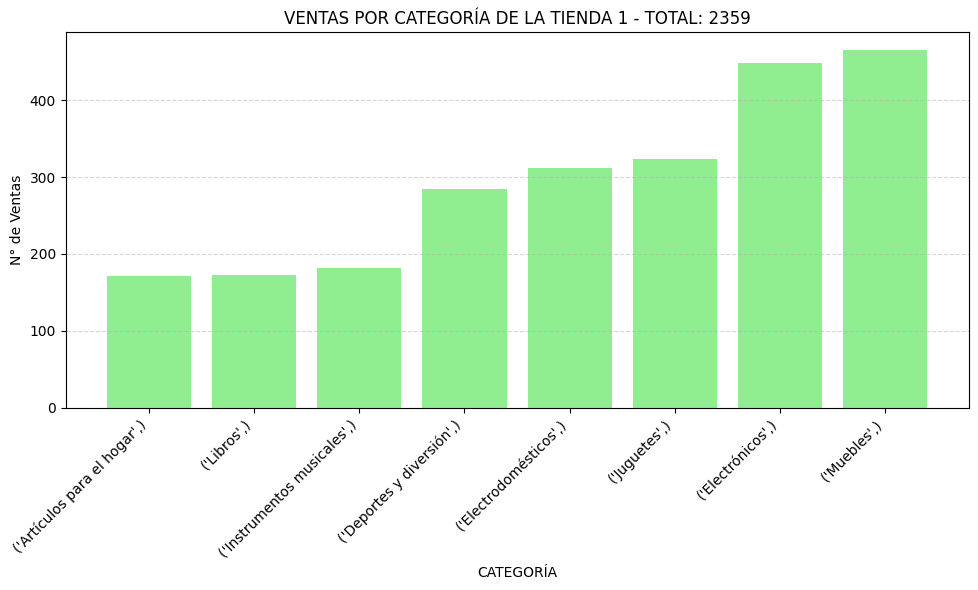

In [5]:
#################### TIENDA 1

# Agrupar y contar
total = 0
group_data = []
catTienda1=dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    count = grupo_df.shape[0]
    total += count
    group_data.append({"Grupo": nombre, "Count": count})

# CONVERTIMOS LOS DATOS A UN DATAFRAME Y POSTERIOR SE ORDENAN DE MENOR A MAYOR
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Count', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Count'], color='lightgreen')
plt.xlabel('CATEGORÍA')
plt.ylabel('N° de Ventas')
plt.title(f"VENTAS POR CATEGORÍA DE LA TIENDA 1 - TOTAL: {total}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

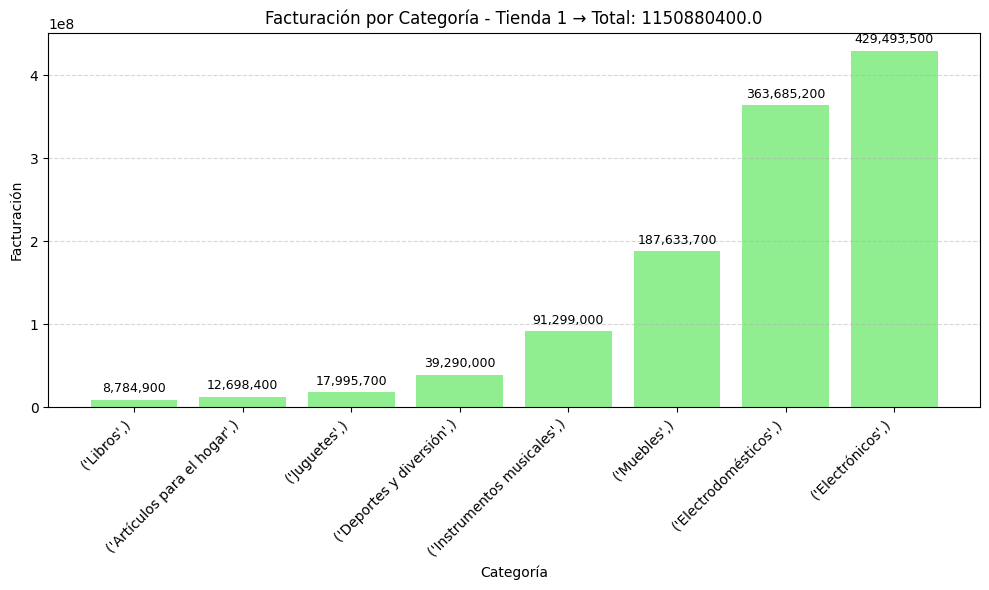

In [7]:
# AGRUPAMOS Y SUMAMOS LAS FACTURAS POR CATEGORÍA
total = 0
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    suma_facturacion = grupo_df['Precio'].sum()
    total += suma_facturacion
    group_data.append({"Grupo": nombre, "Facturación": suma_facturacion})

# CONVERTIMOS LOS DATOA A UN DATAFRAME Y ORDENAMOS DE MENOR A MAYOR
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Facturación', ascending=True)

# GRAFICAMOS
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Facturación'], color='lightgreen')
plt.xlabel('Categoría')
plt.ylabel('Facturación')
plt.title(f"Facturación por Categoría - Tienda 1 → Total: {round(total, 2)}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# MOSTRAMOS VALORES POR ENCIMA DE LAS BARRAS
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (total * 0.005),  # posición y ajuste
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)


# 3. Calificación promedio de la tienda


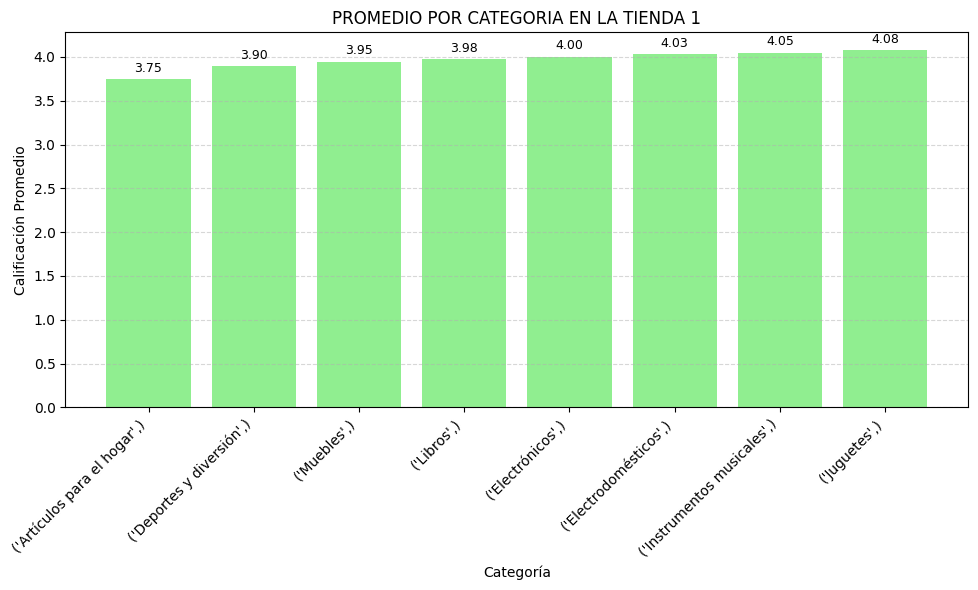

In [14]:
# AGRUPAMOS PRARA CALCULAR EL PROMEDIO POR CATEGORÍA
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    promedio_calificacion = grupo_df['Calificación'].mean()
    group_data.append({"Grupo": nombre, "Calificación Promedio": promedio_calificacion})

# CONVERTIMOS LOS DATOS A DATAFRAME Y ORDENAMOS DE MENOR A MAYOR
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Calificación Promedio', ascending=True)

# GRAFICAMOS
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Calificación Promedio'], color='lightgreen')
plt.xlabel('Categoría')
plt.ylabel('Calificación Promedio')
plt.title("PROMEDIO POR CATEGORIA EN LA TIENDA 1")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# MOSTRAMOS VALORES POR ENCIMA DE LAS BARRAS
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05,
             f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

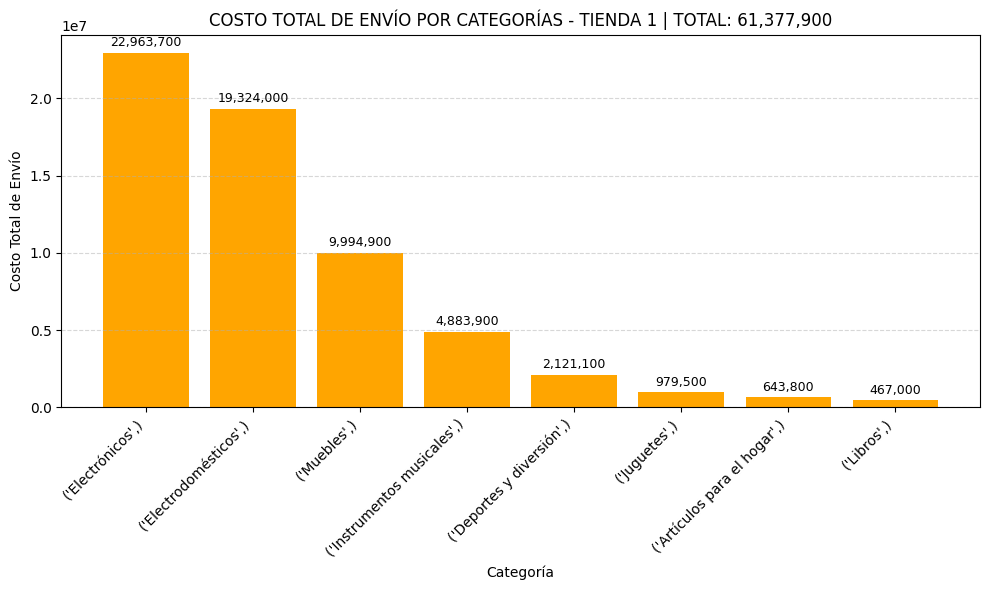

In [21]:
# AGRUPAMOS Y SUMAMOS LOS COSTOS DE ENVÍO POR CATEGORÍA
total = 0
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    costo_total = grupo_df['Costo de envío'].sum()
    total += costo_total
    group_data.append({"Grupo": nombre, "Costo Total": costo_total})

# CONVERTIR DATOS A DATAFRAME Y ORDENAR DE MAYOR A MENOR
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Costo Total', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Costo Total'], color='orange')
plt.xlabel('Categoría')
plt.ylabel('Costo Total de Envío')
plt.title(f"COSTO TOTAL DE ENVÍO POR CATEGORÍAS - TIENDA 1 | TOTAL: {total:,.0f}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas con los valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(df_categorias['Costo Total']) * 0.01,
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.show()


# 4. Productos más y menos vendidos

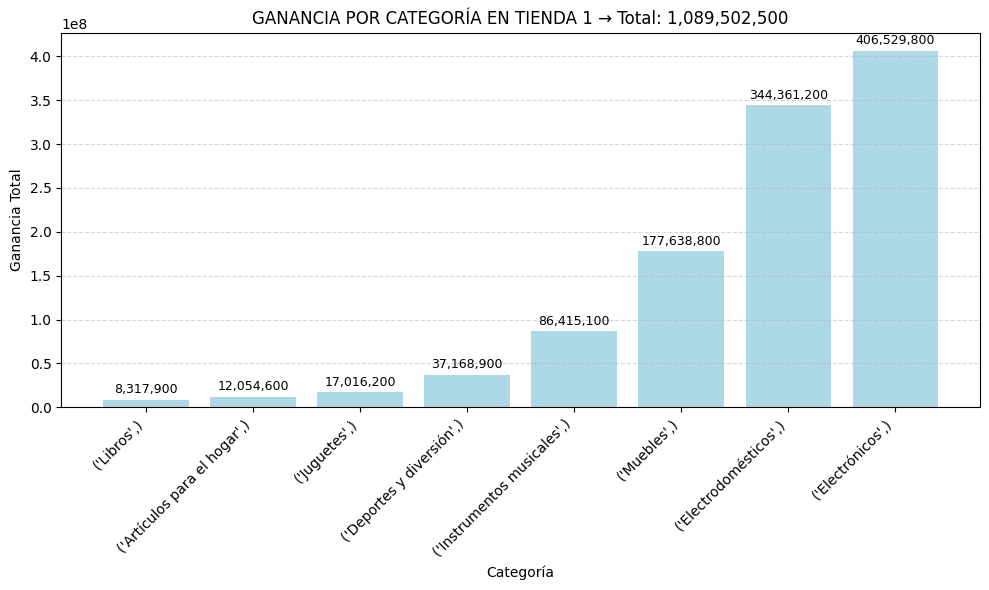

In [23]:
# Agrupar y calcular la ganancia total por categoría
total = 0
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    total += ganancia_total
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Ganancia Total'], color='lightblue')
plt.xlabel('Categoría')
plt.ylabel('Ganancia Total')
plt.title(f"GANANCIA POR CATEGORÍA EN TIENDA 1 → Total: {total:,.0f}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar etiquetas con los valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(df_categorias['Ganancia Total']) * 0.01,
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.show()

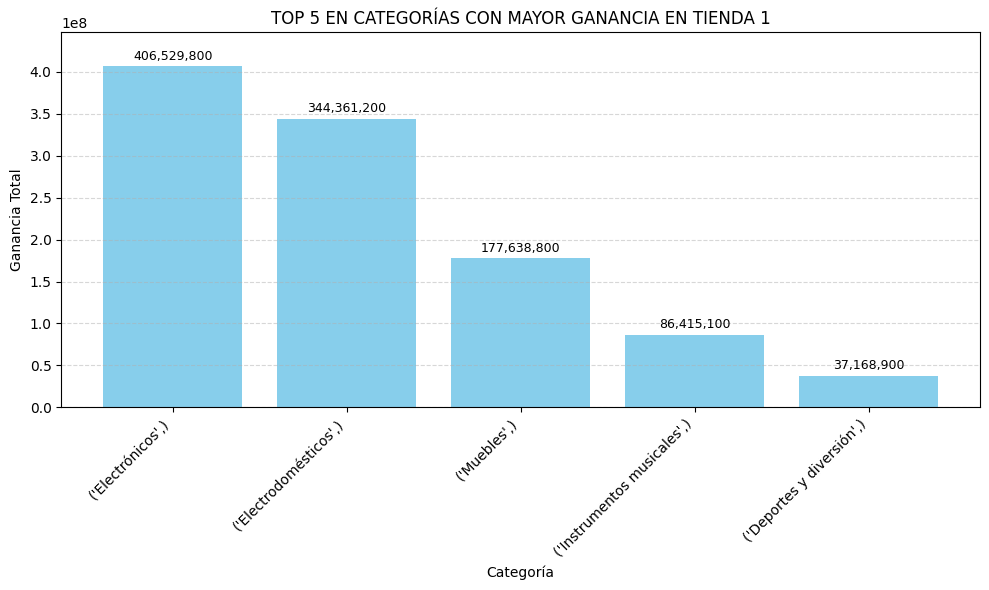

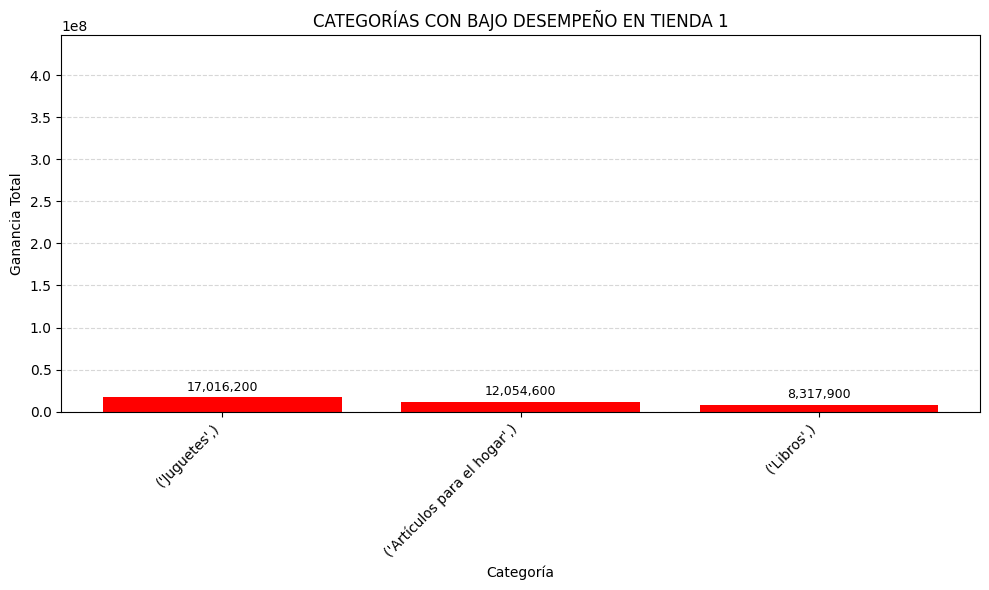

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y calcular la ganancia total por categoría
total = 0
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    total += ganancia_total
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar de mayor a menor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=False)

# Separar las 5 mejores y el resto
top_5 = df_categorias.head(5)
resto = df_categorias.iloc[5:]

# Obtener el mismo límite máximo del eje Y
max_ganancia = df_categorias['Ganancia Total'].max() * 1.10  # 10% margen superior

# Función para graficar con eje Y fijo
def graficar(df, titulo, color, ylim):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['Grupo'].astype(str), df['Ganancia Total'], color=color)
    plt.ylim(0, ylim)
    plt.xlabel('Categoría')
    plt.ylabel('Ganancia Total')
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Etiquetas
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + ylim * 0.01,
                 f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)
    plt.show()

# Graficar con misma escala
graficar(top_5, "TOP 5 EN CATEGORÍAS CON MAYOR GANANCIA EN TIENDA 1", 'skyblue', max_ganancia)
graficar(resto, "CATEGORÍAS CON BAJO DESEMPEÑO EN TIENDA 1", 'red', max_ganancia)

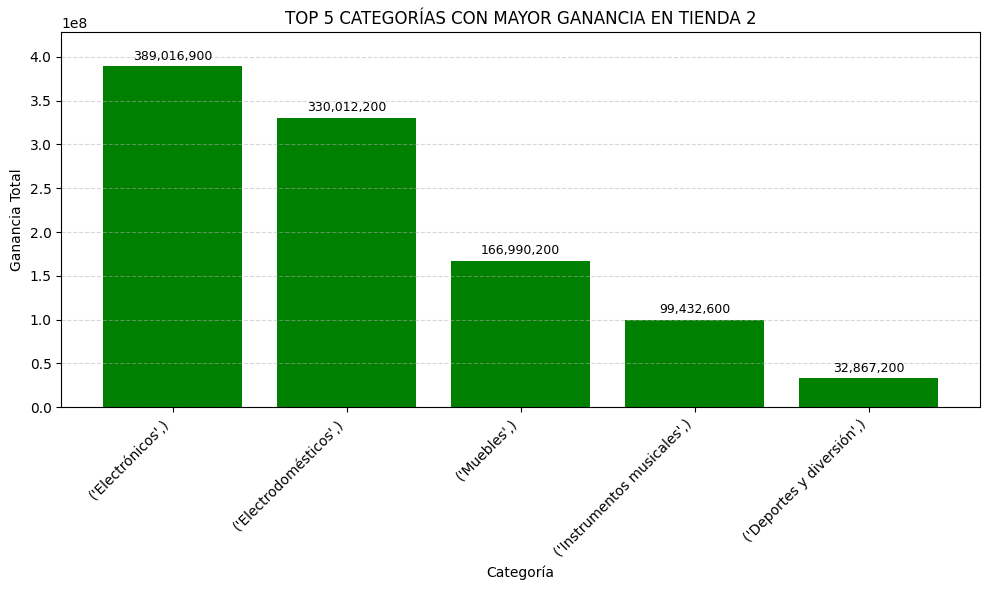

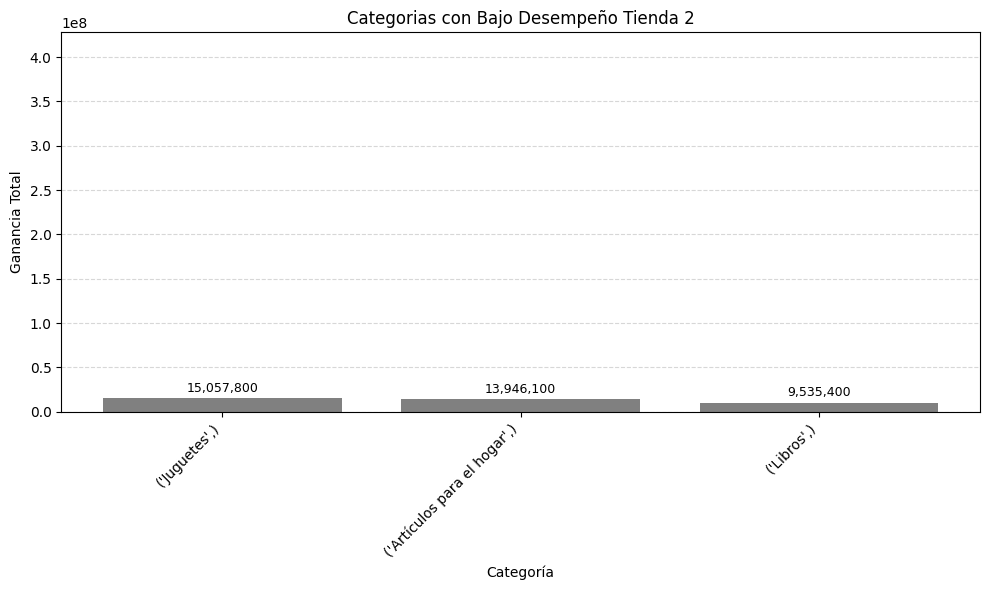

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y calcular la ganancia total por categoría
total = 0
group_data = []
catTienda1 = dTienda2Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    total += ganancia_total
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar de mayor a menor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=False)

# Separar las 5 mejores y el resto
top_5 = df_categorias.head(5)
resto = df_categorias.iloc[5:]

# Obtener el mismo límite máximo del eje Y
max_ganancia = df_categorias['Ganancia Total'].max() * 1.10  # 10% margen superior

# Función para graficar con eje Y fijo
def graficar(df, titulo, color, ylim):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['Grupo'].astype(str), df['Ganancia Total'], color=color)
    plt.ylim(0, ylim)
    plt.xlabel('Categoría')
    plt.ylabel('Ganancia Total')
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Etiquetas
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + ylim * 0.01,
                 f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)
    plt.show()

# Graficar con misma escala
graficar(top_5, "TOP 5 CATEGORÍAS CON MAYOR GANANCIA EN TIENDA 2", 'green', max_ganancia)
graficar(resto, "Categorias con Bajo Desempeño Tienda 2", 'grey', max_ganancia)



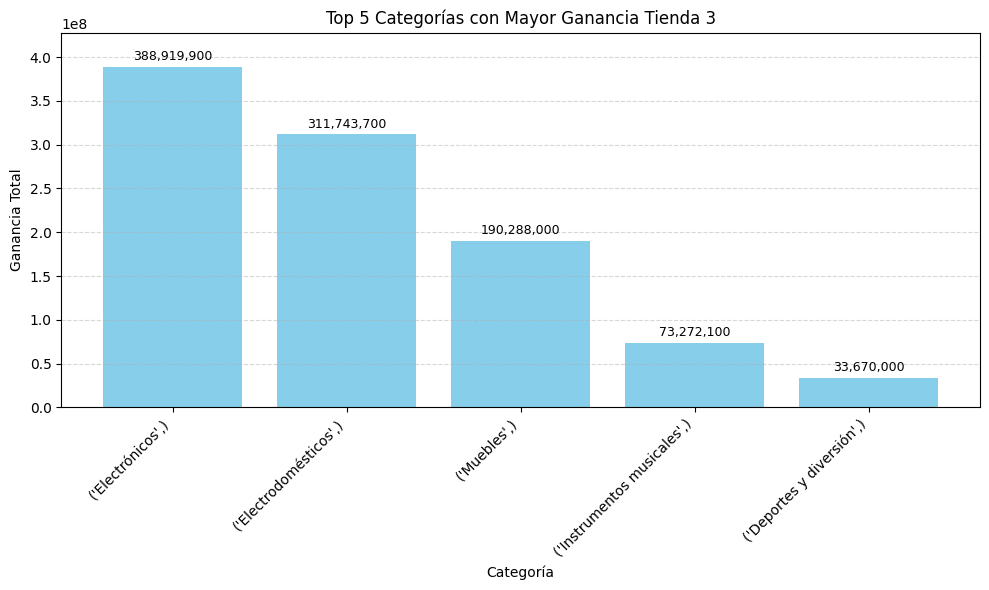

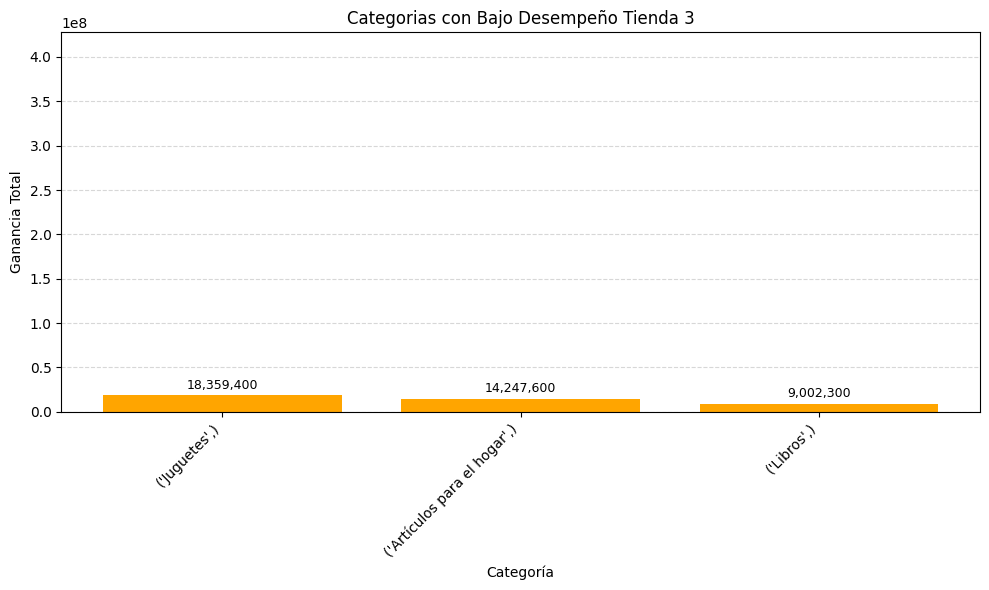

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y calcular la ganancia total por categoría
total = 0
group_data = []
catTienda1 = dTienda3Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    total += ganancia_total
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar de mayor a menor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=False)

# Separar las 5 mejores y el resto
top_5 = df_categorias.head(5)
resto = df_categorias.iloc[5:]

# Obtener el mismo límite máximo del eje Y
max_ganancia = df_categorias['Ganancia Total'].max() * 1.10  # 10% margen superior

# Función para graficar con eje Y fijo
def graficar(df, titulo, color, ylim):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['Grupo'].astype(str), df['Ganancia Total'], color=color)
    plt.ylim(0, ylim)
    plt.xlabel('Categoría')
    plt.ylabel('Ganancia Total')
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Etiquetas
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + ylim * 0.01,
                 f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)
    plt.show()

# Graficar con misma escala
graficar(top_5, "Top 5 Categorías con Mayor Ganancia Tienda 3", 'skyblue', max_ganancia)
graficar(resto, "Categorias con Bajo Desempeño Tienda 3", 'orange', max_ganancia)


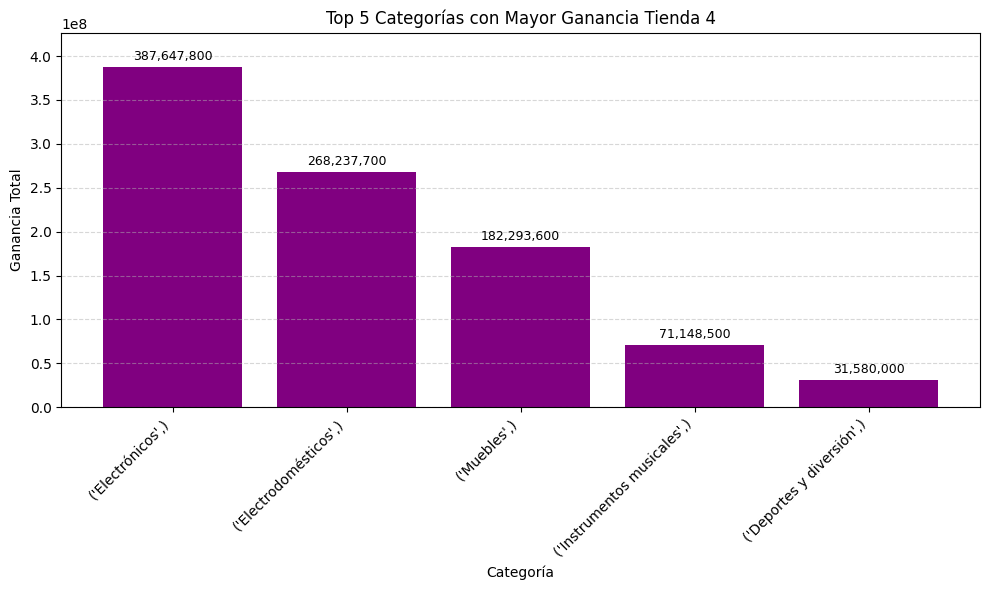

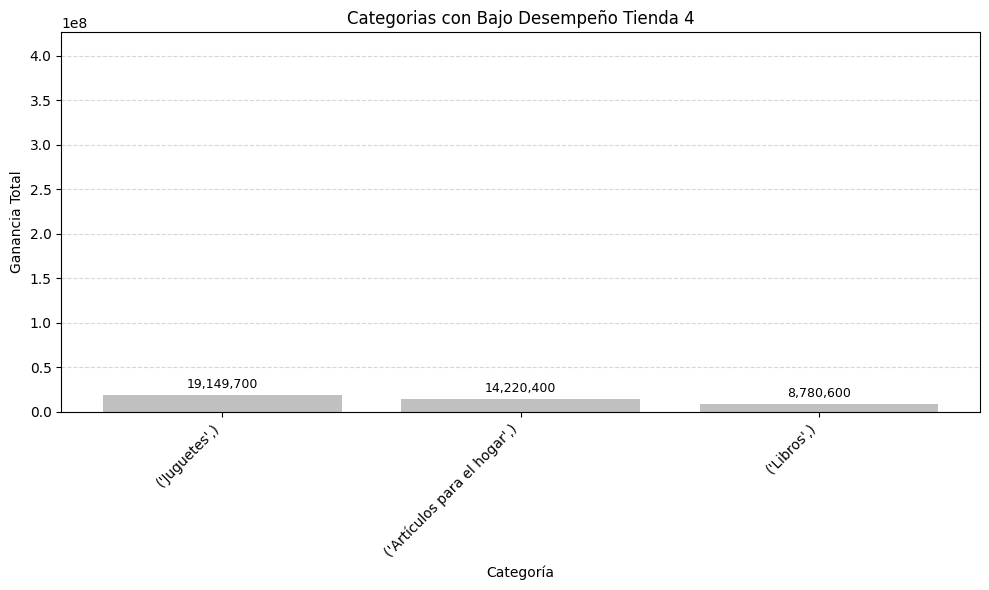

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y calcular la ganancia total por categoría
total = 0
group_data = []
catTienda1 = dTienda4Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    total += ganancia_total
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar de mayor a menor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=False)

# Separar las 5 mejores y el resto
top_5 = df_categorias.head(5)
resto = df_categorias.iloc[5:]

# Obtener el mismo límite máximo del eje Y
max_ganancia = df_categorias['Ganancia Total'].max() * 1.10  # 10% margen superior

# Función para graficar con eje Y fijo
def graficar(df, titulo, color, ylim):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['Grupo'].astype(str), df['Ganancia Total'], color=color)
    plt.ylim(0, ylim)
    plt.xlabel('Categoría')
    plt.ylabel('Ganancia Total')
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Etiquetas
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + ylim * 0.01,
                 f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)
    plt.show()

# Graficar con misma escala
graficar(top_5, "Top 5 Categorías con Mayor Ganancia Tienda 4", 'purple', max_ganancia)
graficar(resto, "Categorias con Bajo Desempeño Tienda 4", 'silver', max_ganancia)


# 5. Envío promedio por tienda

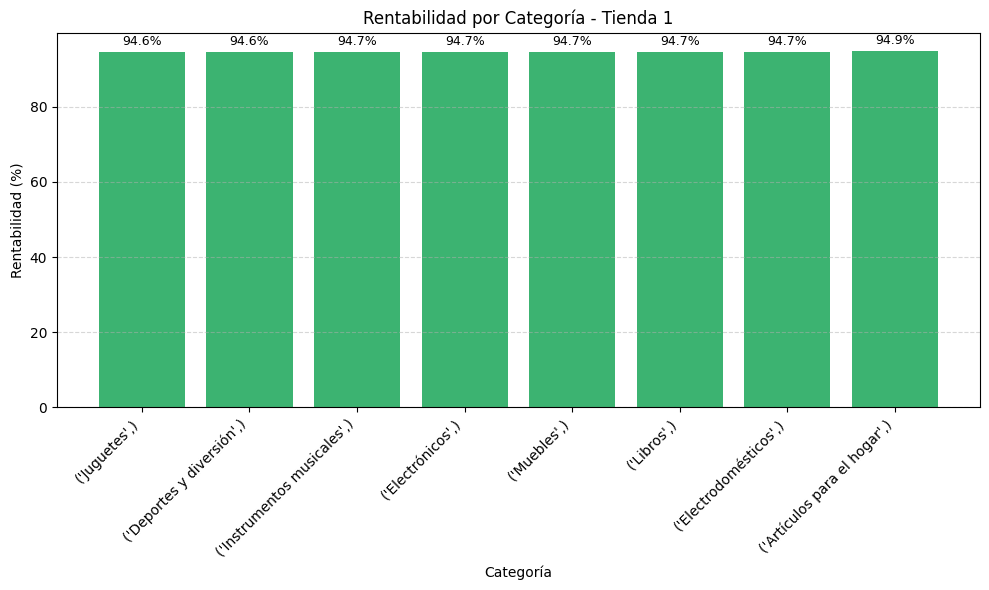

In [34]:
# Agrupar y calcular rentabilidad por categoría
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    facturacion = grupo_df['Precio'].sum()
    costo_envio = grupo_df['Costo de envío'].sum()
    ganancia = facturacion - costo_envio
    rentabilidad_pct = (ganancia / facturacion) * 100 if facturacion > 0 else 0
    group_data.append({
        "Categoría": nombre,
        "Rentabilidad %": rentabilidad_pct
    })

# Convertir a DataFrame y ordenar
df_rentabilidad = pd.DataFrame(group_data)
df_rentabilidad = df_rentabilidad.sort_values(by='Rentabilidad %', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_rentabilidad['Categoría'].astype(str), df_rentabilidad['Rentabilidad %'], color='mediumseagreen')
plt.xlabel('Categoría')
plt.ylabel('Rentabilidad (%)')
plt.title("Rentabilidad por Categoría - Tienda 1")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             f'{yval:.1f}%', ha='center', va='bottom', fontsize=9)

plt.show()

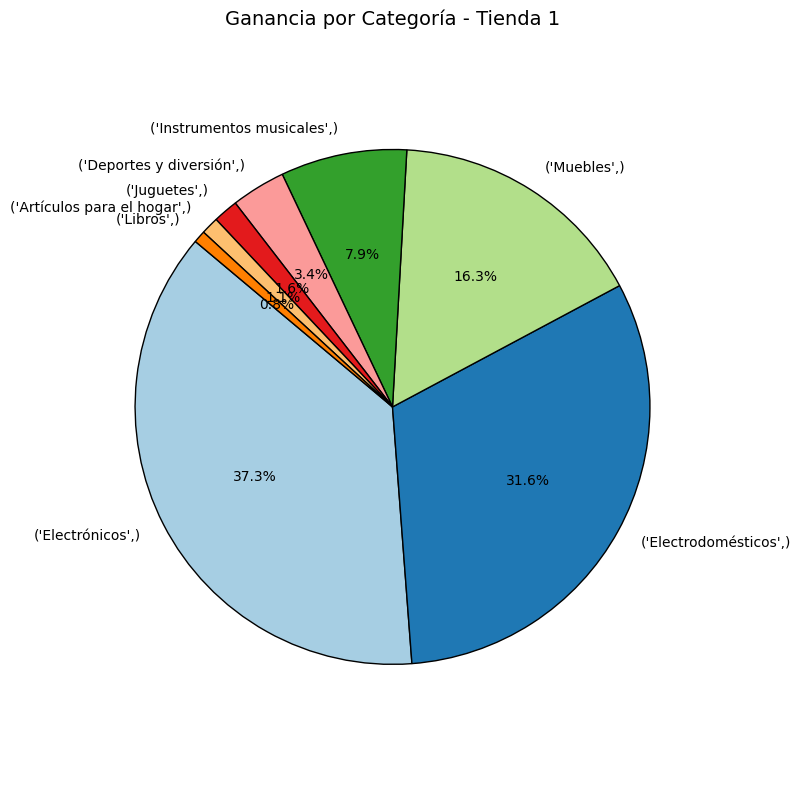

In [35]:
# Agrupar y calcular la ganancia total por categoría
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=False)

# Graficar Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df_categorias['Ganancia Total'],
        labels=df_categorias['Grupo'].astype(str),
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'})

plt.title("Ganancia por Categoría - Tienda 1", fontsize=14)
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()

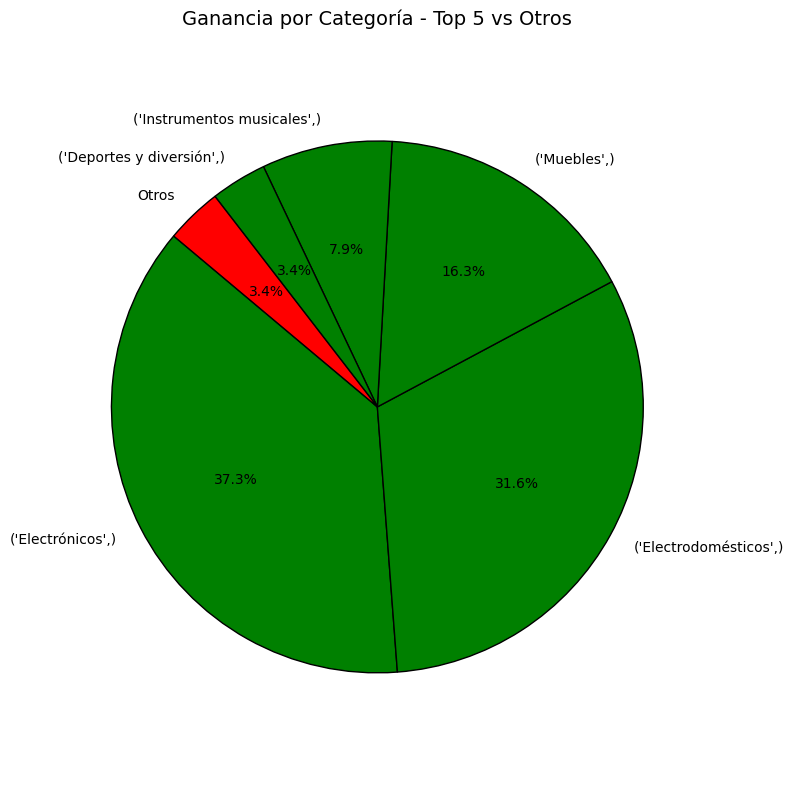

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y calcular la ganancia total por categoría
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    ganancia_total = (grupo_df['Precio'] - grupo_df['Costo de envío']).sum()
    group_data.append({"Grupo": nombre, "Ganancia Total": ganancia_total})

# Convertir a DataFrame y ordenar
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Ganancia Total', ascending=False)

# Separar top 5 y el resto
top_5 = df_categorias.head(5).copy()
resto = df_categorias.iloc[5:]

# Calcular ganancia del resto y agregar como "Otros"
otros_total = resto['Ganancia Total'].sum()
top_5 = pd.concat([top_5, pd.DataFrame([{'Grupo': 'Otros', 'Ganancia Total': otros_total}])], ignore_index=True)

# Definir colores: verdes para top 5, rojo para "Otros"
colors = ['green'] * 5 + ['red']

# Graficar Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_5['Ganancia Total'],
        labels=top_5['Grupo'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'})

plt.title("Ganancia por Categoría - Top 5 vs Otros", fontsize=14)
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()

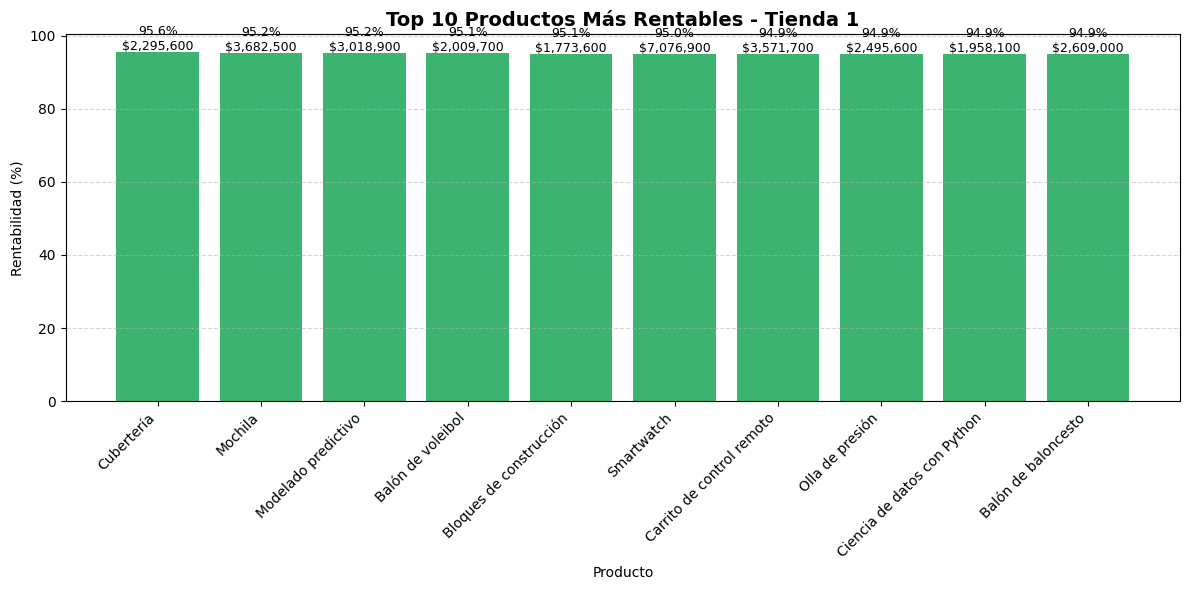

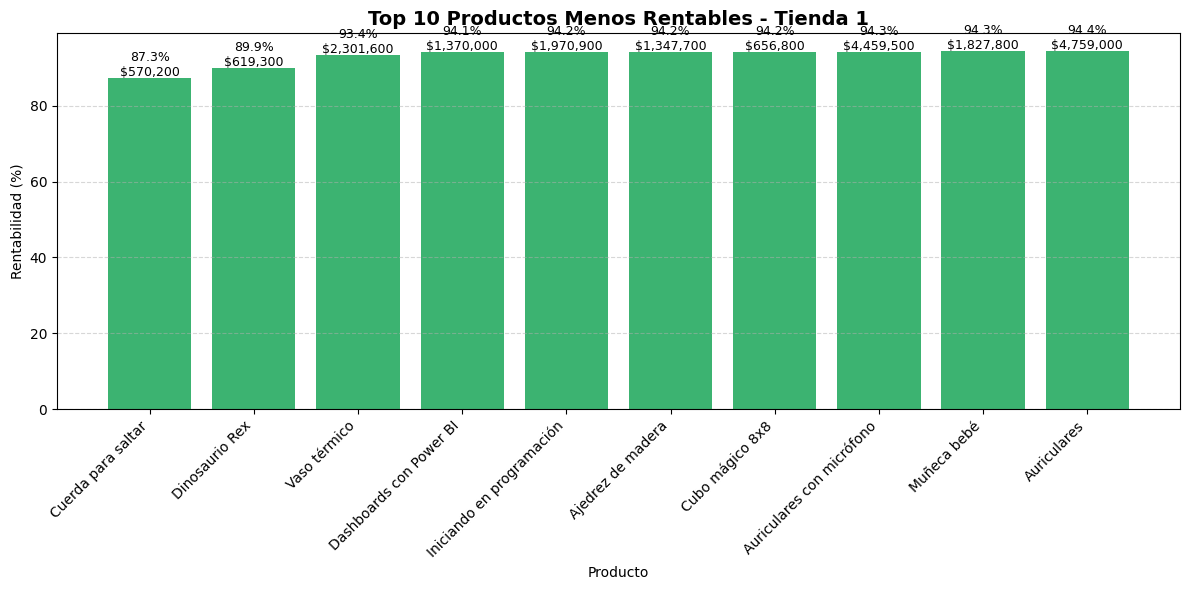

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular rentabilidad por producto
product_data = []
productos = dTiendaClear.groupby('Producto')

for nombre, grupo_df in productos:
    precio_total = grupo_df['Precio'].sum()
    costo_total = grupo_df['Costo de envío'].sum()
    ganancia = precio_total - costo_total
    rentabilidad_pct = (ganancia / precio_total) * 100 if precio_total > 0 else 0
    product_data.append({
        'Producto': nombre,
        'Rentabilidad %': rentabilidad_pct,
        'Ganancia': ganancia,
        'Precio Total': precio_total,
        'Unidades': len(grupo_df),
        'Precio Promedio': grupo_df['Precio'].mean(),
        'Costo Promedio': grupo_df['Costo de envío'].mean()
    })

# Crear DataFrame
df_productos = pd.DataFrame(product_data)
df_ordenado = df_productos.sort_values(by='Rentabilidad %', ascending=True)

# Separar en dos grupos
top_10 = df_ordenado.tail(10).sort_values(by='Rentabilidad %', ascending=False)
bottom_10 = df_ordenado.head(10)

# Función para graficar
def graficar_rentabilidad(df, titulo):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Producto'], df['Rentabilidad %'], color='mediumseagreen')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel('Rentabilidad (%)')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')

    # Agregar anotaciones
    for bar, (_, row) in zip(bars, df.iterrows()):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
                f"{yval:.1f}%\n${row['Ganancia']:,.0f}", ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Mostrar los dos gráficos
graficar_rentabilidad(top_10, 'Top 10 Productos Más Rentables - Tienda 1')
graficar_rentabilidad(bottom_10, 'Top 10 Productos Menos Rentables - Tienda 1')

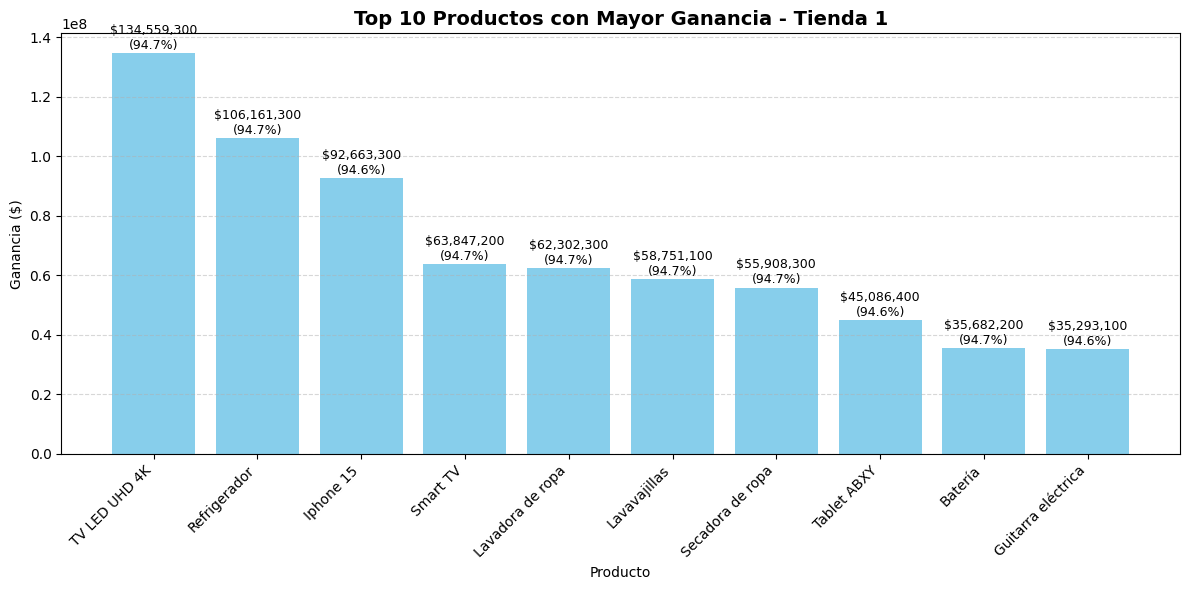

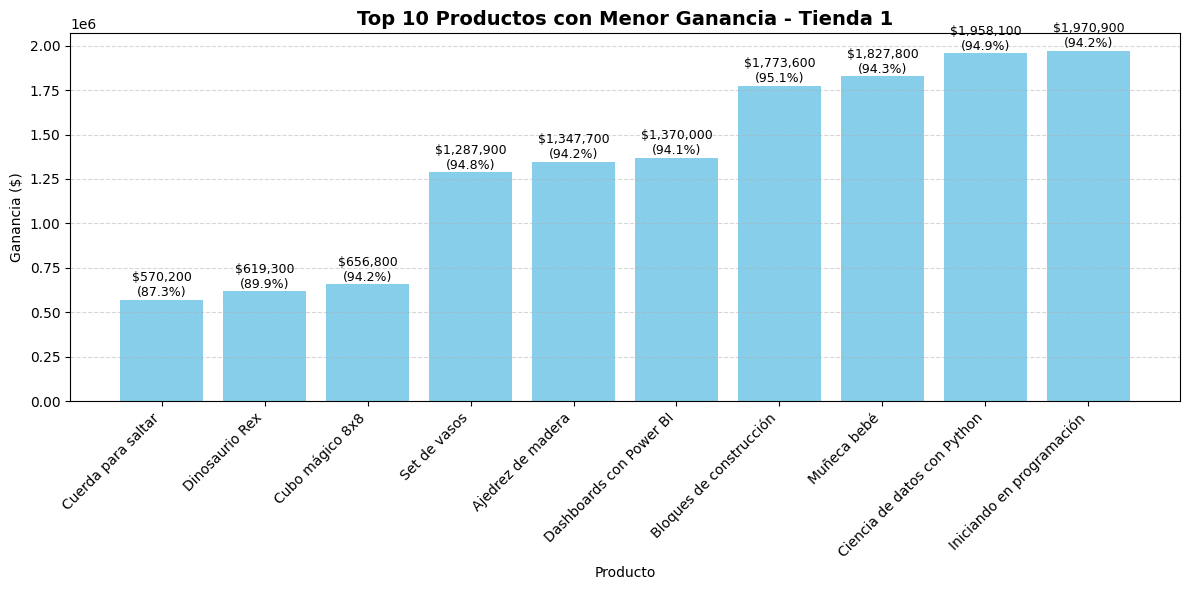

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular rentabilidad por producto
product_data = []
productos = dTiendaClear.groupby('Producto')

for nombre, grupo_df in productos:
    precio_total = grupo_df['Precio'].sum()
    costo_total = grupo_df['Costo de envío'].sum()
    ganancia = precio_total - costo_total
    rentabilidad_pct = (ganancia / precio_total) * 100 if precio_total > 0 else 0
    product_data.append({
        'Producto': nombre,
        'Rentabilidad %': rentabilidad_pct,
        'Ganancia': ganancia,
        'Precio Total': precio_total,
        'Unidades': len(grupo_df),
        'Precio Promedio': grupo_df['Precio'].mean(),
        'Costo Promedio': grupo_df['Costo de envío'].mean()
    })

# Crear DataFrame
df_productos = pd.DataFrame(product_data)
df_ordenado = df_productos.sort_values(by='Ganancia', ascending=True)

# Separar en dos grupos (por ganancia)
top_10 = df_ordenado.tail(10).sort_values(by='Ganancia', ascending=False)
bottom_10 = df_ordenado.head(10)

# Función para graficar
def graficar_rentabilidad(df, titulo):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Producto'], df['Ganancia'], color='skyblue')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel('Ganancia ($)')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')

    # Agregar anotaciones
    for bar, (_, row) in zip(bars, df.iterrows()):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * df['Ganancia'].max(),
                f"${yval:,.0f}\n({row['Rentabilidad %']:.1f}%)",
                ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Mostrar los dos gráficos
graficar_rentabilidad(top_10, 'Top 10 Productos con Mayor Ganancia - Tienda 1')
graficar_rentabilidad(bottom_10, 'Top 10 Productos con Menor Ganancia - Tienda 1')

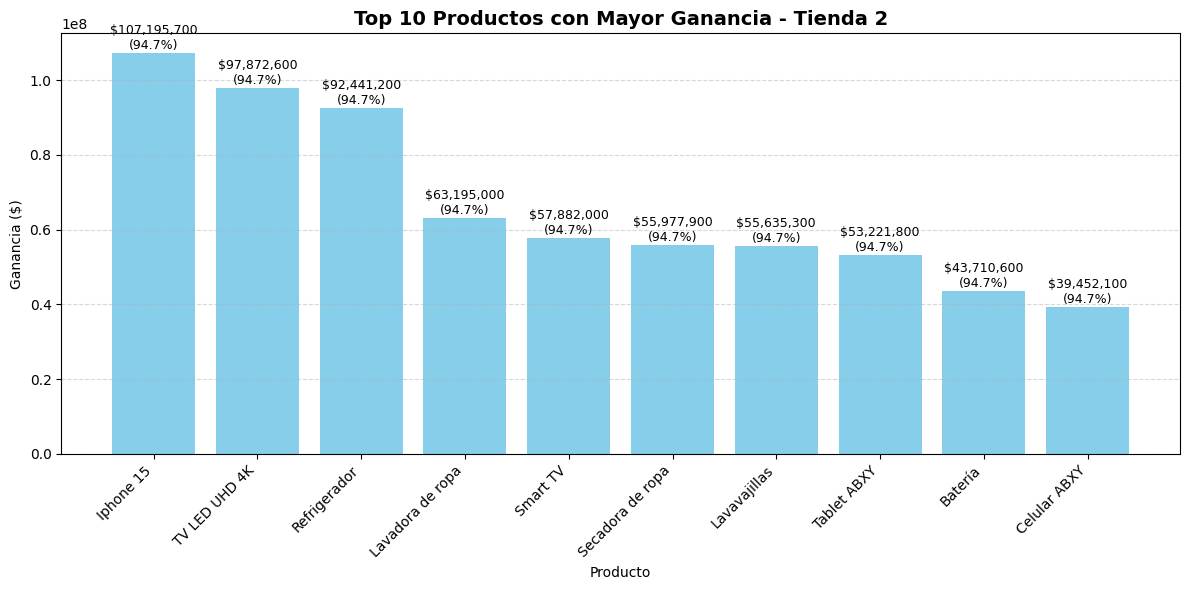

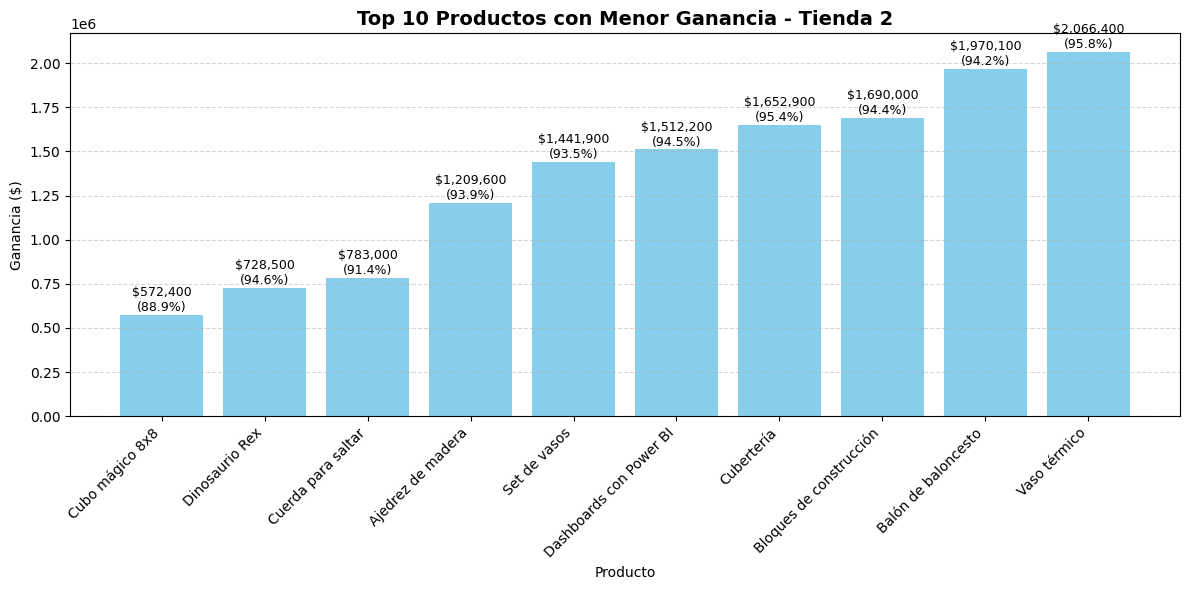

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular rentabilidad por producto
product_data = []
productos = dTienda2Clear.groupby('Producto')

for nombre, grupo_df in productos:
    precio_total = grupo_df['Precio'].sum()
    costo_total = grupo_df['Costo de envío'].sum()
    ganancia = precio_total - costo_total
    rentabilidad_pct = (ganancia / precio_total) * 100 if precio_total > 0 else 0
    product_data.append({
        'Producto': nombre,
        'Rentabilidad %': rentabilidad_pct,
        'Ganancia': ganancia,
        'Precio Total': precio_total,
        'Unidades': len(grupo_df),
        'Precio Promedio': grupo_df['Precio'].mean(),
        'Costo Promedio': grupo_df['Costo de envío'].mean()
    })

# Crear DataFrame
df_productos = pd.DataFrame(product_data)
df_ordenado = df_productos.sort_values(by='Ganancia', ascending=True)

# Separar en dos grupos (por ganancia)
top_10 = df_ordenado.tail(10).sort_values(by='Ganancia', ascending=False)
bottom_10 = df_ordenado.head(10)

# Función para graficar
def graficar_rentabilidad(df, titulo):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Producto'], df['Ganancia'], color='skyblue')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel('Ganancia ($)')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')

    # Agregar anotaciones
    for bar, (_, row) in zip(bars, df.iterrows()):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * df['Ganancia'].max(),
                f"${yval:,.0f}\n({row['Rentabilidad %']:.1f}%)",
                ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Mostrar los dos gráficos
graficar_rentabilidad(top_10, 'Top 10 Productos con Mayor Ganancia - Tienda 2')
graficar_rentabilidad(bottom_10, 'Top 10 Productos con Menor Ganancia - Tienda 2')

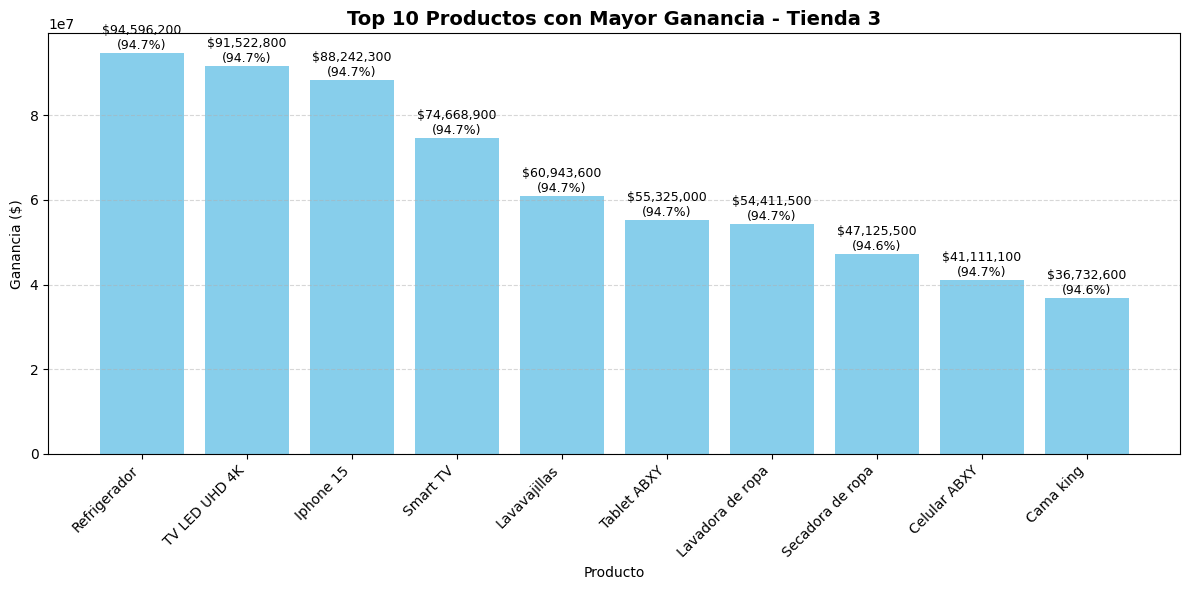

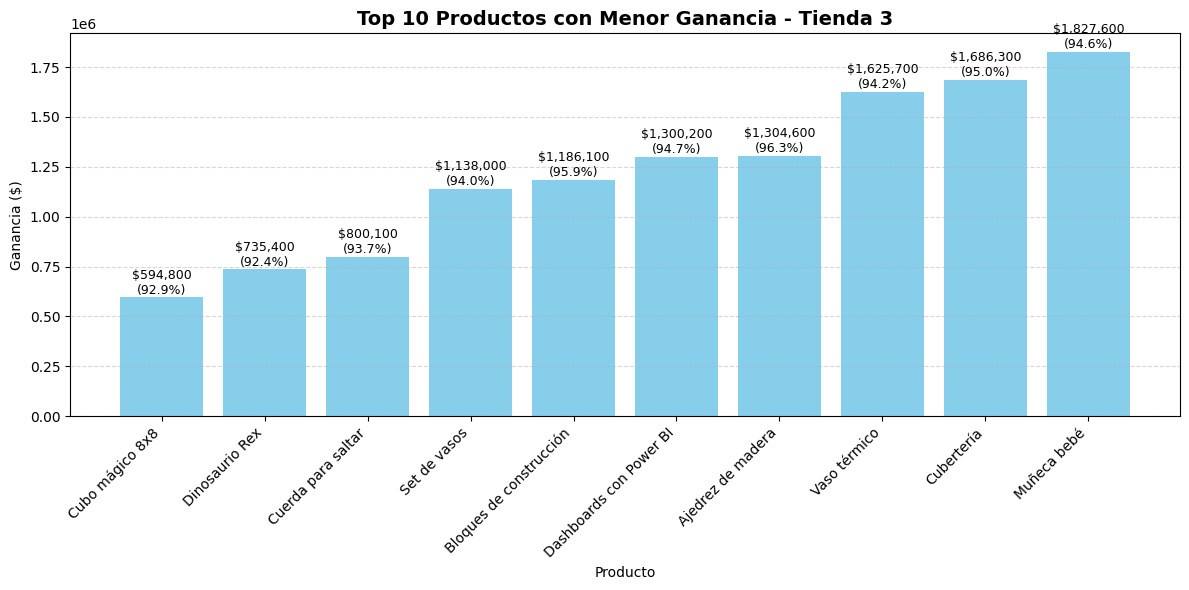

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular rentabilidad por producto
product_data = []
productos = dTienda3Clear.groupby('Producto')

for nombre, grupo_df in productos:
    precio_total = grupo_df['Precio'].sum()
    costo_total = grupo_df['Costo de envío'].sum()
    ganancia = precio_total - costo_total
    rentabilidad_pct = (ganancia / precio_total) * 100 if precio_total > 0 else 0
    product_data.append({
        'Producto': nombre,
        'Rentabilidad %': rentabilidad_pct,
        'Ganancia': ganancia,
        'Precio Total': precio_total,
        'Unidades': len(grupo_df),
        'Precio Promedio': grupo_df['Precio'].mean(),
        'Costo Promedio': grupo_df['Costo de envío'].mean()
    })

# Crear DataFrame
df_productos = pd.DataFrame(product_data)
df_ordenado = df_productos.sort_values(by='Ganancia', ascending=True)

# Separar en dos grupos (por ganancia)
top_10 = df_ordenado.tail(10).sort_values(by='Ganancia', ascending=False)
bottom_10 = df_ordenado.head(10)

# Función para graficar
def graficar_rentabilidad(df, titulo):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Producto'], df['Ganancia'], color='skyblue')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel('Ganancia ($)')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')

    # Agregar anotaciones
    for bar, (_, row) in zip(bars, df.iterrows()):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * df['Ganancia'].max(),
                f"${yval:,.0f}\n({row['Rentabilidad %']:.1f}%)",
                ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Mostrar los dos gráficos
graficar_rentabilidad(top_10, 'Top 10 Productos con Mayor Ganancia - Tienda 3')
graficar_rentabilidad(bottom_10, 'Top 10 Productos con Menor Ganancia - Tienda 3')

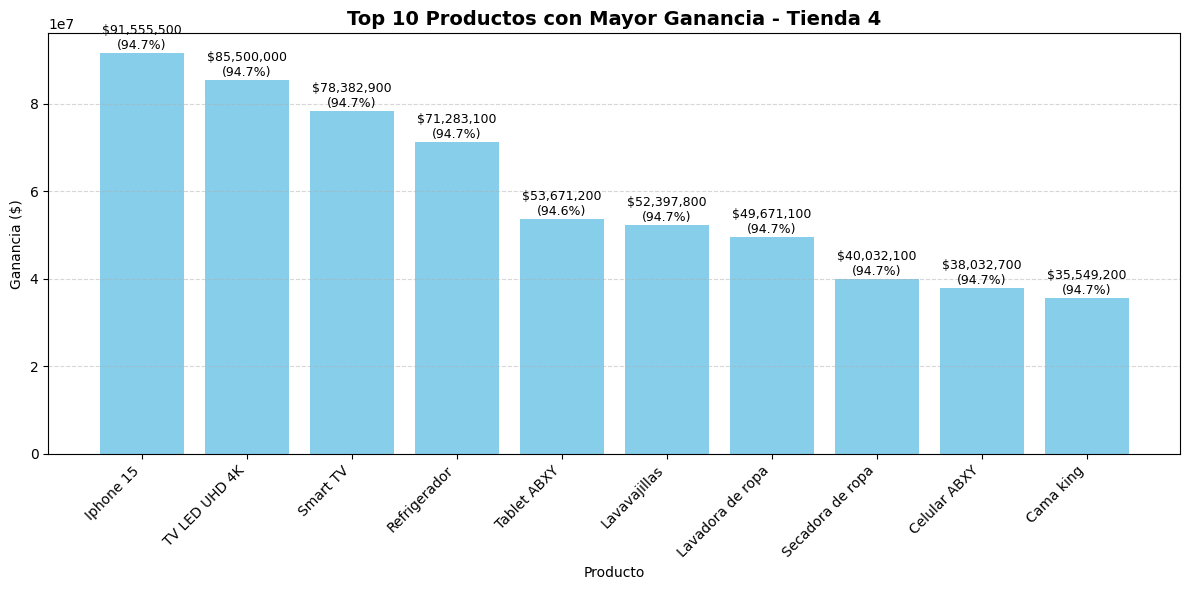

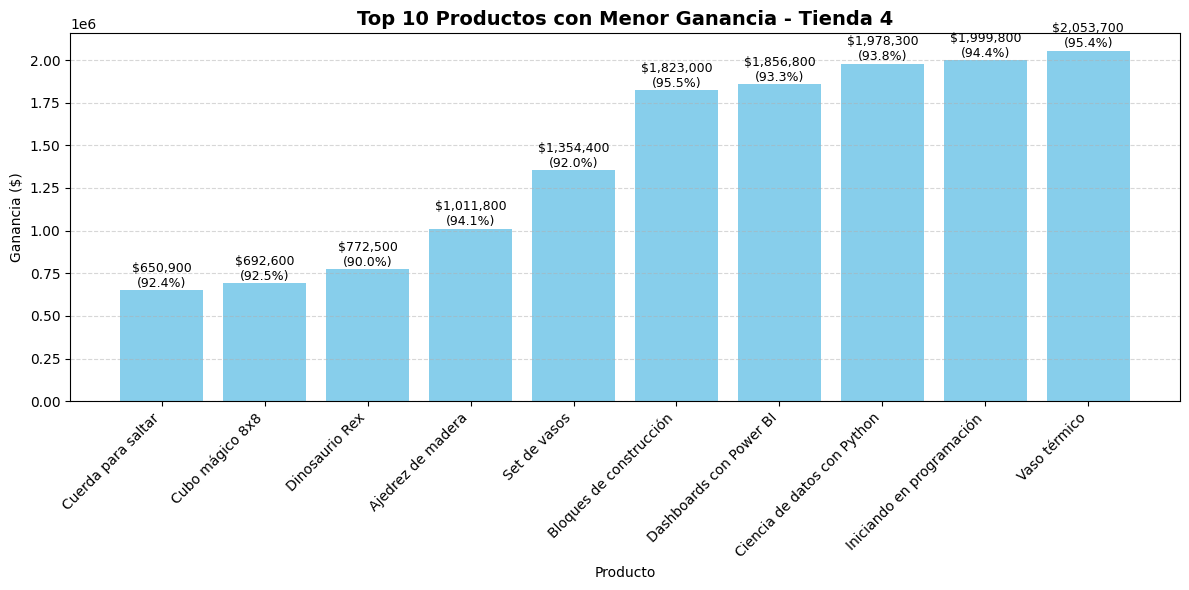

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular rentabilidad por producto
product_data = []
productos = dTienda4Clear.groupby('Producto')

for nombre, grupo_df in productos:
    precio_total = grupo_df['Precio'].sum()
    costo_total = grupo_df['Costo de envío'].sum()
    ganancia = precio_total - costo_total
    rentabilidad_pct = (ganancia / precio_total) * 100 if precio_total > 0 else 0
    product_data.append({
        'Producto': nombre,
        'Rentabilidad %': rentabilidad_pct,
        'Ganancia': ganancia,
        'Precio Total': precio_total,
        'Unidades': len(grupo_df),
        'Precio Promedio': grupo_df['Precio'].mean(),
        'Costo Promedio': grupo_df['Costo de envío'].mean()
    })

# Crear DataFrame
df_productos = pd.DataFrame(product_data)
df_ordenado = df_productos.sort_values(by='Ganancia', ascending=True)

# Separar en dos grupos (por ganancia)
top_10 = df_ordenado.tail(10).sort_values(by='Ganancia', ascending=False)
bottom_10 = df_ordenado.head(10)

# Función para graficar
def graficar_rentabilidad(df, titulo):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df['Producto'], df['Ganancia'], color='skyblue')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel('Ganancia ($)')
    ax.set_xlabel('Producto')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')

    # Agregar anotaciones
    for bar, (_, row) in zip(bars, df.iterrows()):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * df['Ganancia'].max(),
                f"${yval:,.0f}\n({row['Rentabilidad %']:.1f}%)",
                ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Mostrar los dos gráficos
graficar_rentabilidad(top_10, 'Top 10 Productos con Mayor Ganancia - Tienda 4')
graficar_rentabilidad(bottom_10, 'Top 10 Productos con Menor Ganancia - Tienda 4')
